In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='notebook', style='darkgrid',palette='dark', font_scale=1.2)
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

<AxesSubplot:>

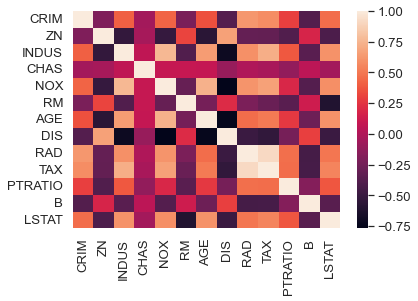

In [55]:
# Loading Dataset
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
sns.heatmap(boston_df.corr())

In [56]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [57]:
class LinearRegression:
    def fit(self, X, y, alpha=0.0001, max_iter=30):
        def gradientDescent(X, y, alpha, max_iter):
            m, n = X.shape[0], X.shape[1]+1
            theta = np.random.randn(n).reshape((n, 1))

            # Add a column-vector for all 1's for the intercept
            X = np.concatenate((np.ones(shape=(m, 1)), X), axis=1)
            prv_cost = float('inf')
            # Repeat until Converge
            for _ in range(max_iter):
                y_pred = X.dot(theta)
                error = y_pred - y

                # Calculate the cost and check for convergence
                cost = (1 / (2 * m)) * np.sum(error ** 2) % (1e9)

                if abs(cost-prv_cost) < 1e-6:
                    break

                # Compute the gradient and update the parameters
                gradient = (1 / m) * X.T.dot(error).sum()
                theta -= alpha * gradient

                # Update Prv-cost
                prv_cost = cost
            return theta

        self.theta = gradientDescent(X, y, alpha, max_iter)

    def predict(self, X):
        try:
            m, n = X.shape[0], X.shape[1]+1
            X = np.concatenate((np.ones(shape=(m, 1)), X), axis=1)
            y_pred = X .dot(self.theta)
            return y_pred
        except:
            raise Exception("Fit the model properly !")


In [58]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([[2.51381276e+138],
       [2.80501887e+138],
       [3.94571043e+138],
       [2.38528413e+138],
       [2.55000459e+138],
       [2.83060574e+138],
       [2.53022516e+138],
       [2.54457913e+138],
       [2.57413069e+138],
       [2.83892142e+138],
       [2.64211621e+138],
       [2.86283505e+138],
       [2.64654871e+138],
       [2.62978093e+138],
       [2.82612826e+138],
       [2.41928977e+138],
       [2.65545678e+138],
       [3.18231283e+138],
       [3.77609667e+138],
       [2.71039022e+138],
       [2.64675506e+138],
       [3.49020835e+138],
       [3.00580974e+138],
       [3.80414221e+138],
       [3.19670650e+138],
       [2.75997232e+138],
       [3.16304000e+138],
       [3.88544948e+138],
       [3.89388945e+138],
       [2.47691186e+138],
       [2.64286153e+138],
       [3.71819007e+138],
       [2.45238528e+138],
       [2.52992990e+138],
       [3.81916738e+138],
       [2.67791138e+138],
       [2.72978336e+138],
       [2.60787117e+138],
       [3.99

Text(0.5, 1.0, 'Predicted-Values')

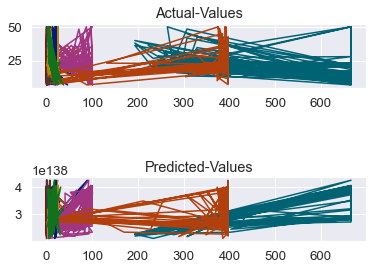

In [59]:
plt.subplot(3, 1, 1)
plt.plot(X_test, y_test)
plt.title("Actual-Values")


plt.subplot(3, 1, 3)
plt.plot(X_test, y_pred)
plt.title("Predicted-Values")


`SK-Learns Model Prediction`

In [60]:
from sklearn.linear_model import LinearRegression as Lin_Reg
sk_model=Lin_Reg()
sk_model.fit(X_train,y_train)
sk_pred=sk_model.predict(X_test)

Text(0.5, 1.0, 'Sk-learns Predicted-Values')

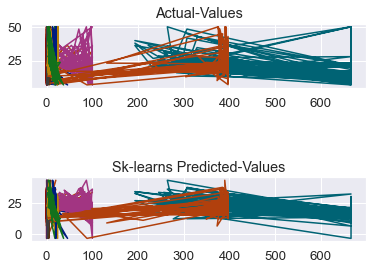

In [61]:
plt.subplot(3, 1, 1)
plt.plot(X_test, y_test)
plt.title("Actual-Values")


plt.subplot(3, 1, 3)
plt.plot(X_test, sk_pred)
plt.title("Sk-learns Predicted-Values")

In [62]:
my_mse = mean_squared_error(y_test, y_pred)
my_r2 = r2_score(y_test, y_pred)

sk_mse = mean_squared_error(y_test, sk_pred)
sk_r2 = r2_score(y_test, sk_pred)

print("My Mean Squared Error: ", my_mse)
print("My R-squared: ", my_r2)
print("sk-learns Mean Squared Error: ", sk_mse)
print("sk-learns R-squared: ", sk_r2)

My Mean Squared Error:  8.805773840992692e+276
My R-squared:  -1.0682810470280349e+275
sk-learns Mean Squared Error:  30.703498625511028
sk-learns R-squared:  0.6275175100864601
